In [75]:
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [109]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 6,4
rcParams['font.size'] = 15
sns.set()
np.random.seed(8)

# T Test

Hypotheses:
 - H0: De gemiddelde ranking van een website met META titel is gelijk aan die zonder een META titel
 - HA: De gemiddelde ranking van een website met META titel is ongelijk aan die zonder een META titel (scoort hoger of lager)
 - H0: De gemiddelde ranking van een website met META beschrijving is gelijk aan die zonder een META beschrijving
 - HA: De gemiddelde ranking van een website met META beschrijving is ongelijk aan die zonder een META beschrijving (scoort hoger of lager)

In [90]:
df = pd.read_csv('50ColDF.csv')
df.head()

,Number,Dn,Ur,Keyword,Kd,HeaderCount,ListsCount,InternalLinksSoup,ExternalLinksSoup,InternalLinksSEMrush,ExternalLinksSEMrush,BacklinksSEMrush,Total Images,Image Tags,Content-length,META-Title,META-Description,Creation Date
0,0,bouwmaat.nl,https://www.bouwmaat.nl/bouwmaterialen,bouwmaterialen,82.48,4.0,31.0,1426.0,10.0,43.0,77.0,6884.0,23,"['None', 'None', 'None', 'None', 'None', 'None...",753,Bouwmaterialen kopen: Online of in de vestigin...,Bouwmaterialen kopen ✓ Online of in de vestigi...,None
1,1,hornbach.nl,https://www.hornbach.nl/shop/Bouwmateriaal/S44...,bouwmaterialen,82.48,10.0,17.0,217.0,7.0,42.0,79.0,633.0,21,"['Hornbach logo', 'Assortiment Binnenafbouw', ...",367,Bouwmaterialen kopen? .HORNBACH. Laagste prijs,Bekijk ons assortiment Bouwmateriaal in onze ...,None
2,2,bouwbestel.nl,https://www.bouwbestel.nl/bouwmaterialen.html,bouwmaterialen,82.48,2.0,7.0,2595.0,14.0,128.0,19.0,12.0,57,"['Uniebouw', 'None', 'None', 'None', 'None', '...",252,Bouwmaterialen Online - Bouwbestel - Bouwmater...,Op zoek naar bouwmaterialen? Bij Bouwbestel be...,None
3,3,online-bouwmaterialen.nl,https://www.online-bouwmaterialen.nl/,bouwmaterialen,82.48,3.0,31.0,138.0,10.0,2.0,2.0,36.0,52,"['Online Bouwmaterialen, bestel bouwmaterialen...",1782,Bouwmaterialen Online kopen? | Online Bouwmate...,Bij Online Bouwmaterialen koopt u de beste kwa...,None
4,4,bmn.nl,https://www.bmn.nl/,bouwmaterialen,82.48,3.0,12.0,563.0,5.0,150.0,178.0,12.0,46,"['BMN Bouwmaterialen', 'BMN Bouwmaterialen', '...",175,BMN Bouwmaterialen groothandel - BMN Bouwmater...,BMN (Bouwmaterialen Nederland) is de bouwmater...,None


In [91]:
numeric = df[['Number', 'Kd','HeaderCount','ListsCount','InternalLinksSoup','ExternalLinksSoup','InternalLinksSEMrush','ExternalLinksSEMrush','BacklinksSEMrush','Total Images','Content-length']]

In [92]:
numeric

,Number,Kd,HeaderCount,ListsCount,InternalLinksSoup,ExternalLinksSoup,InternalLinksSEMrush,ExternalLinksSEMrush,BacklinksSEMrush,Total Images,Content-length
0,0,82.48,4.0,31.0,1426.0,10.0,43.0,77.0,6884.0,23,753
1,1,82.48,10.0,17.0,217.0,7.0,42.0,79.0,633.0,21,367
2,2,82.48,2.0,7.0,2595.0,14.0,128.0,19.0,12.0,57,252
3,3,82.48,3.0,31.0,138.0,10.0,2.0,2.0,36.0,52,1782
4,4,82.48,3.0,12.0,563.0,5.0,150.0,178.0,12.0,46,175
5,5,82.48,7.0,7.0,1029.0,3.0,42.0,79.0,7.0,37,1651
6,6,82.48,8.0,3.0,138.0,9.0,32.0,294.0,130.0,58,445
7,7,82.48,4.0,1.0,613.0,5.0,53.0,23.0,30.0,28,430
8,8,82.48,1.0,7.0,440.0,5.0,0.0,0.0,6.0,7,150
9,9,82.48,0.0,0.0,0.0,0.0,13.0,117.0,27150.0,0,1832


In [93]:
#print('Missing: %d' % sum(isnan(numeric).flatten()))
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(numeric)
Xtrans = imp.transform(numeric)
# print total missing
#print('Missing: %d' % sum(isnan(Xtrans).flatten()))

In [94]:
cleaned_numeric = pd.DataFrame(Xtrans)
cleaned_numeric.round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,82.48,4.00,31.00,1426.00,10.00,43.00,77.00,6884.00,23.0,753.0
1,1.0,82.48,10.00,17.00,217.00,7.00,42.00,79.00,633.00,21.0,367.0
2,2.0,82.48,2.00,7.00,2595.00,14.00,128.00,19.00,12.00,57.0,252.0
3,3.0,82.48,3.00,31.00,138.00,10.00,2.00,2.00,36.00,52.0,1782.0
4,4.0,82.48,3.00,12.00,563.00,5.00,150.00,178.00,12.00,46.0,175.0
5,5.0,82.48,7.00,7.00,1029.00,3.00,42.00,79.00,7.00,37.0,1651.0
6,6.0,82.48,8.00,3.00,138.00,9.00,32.00,294.00,130.00,58.0,445.0
7,7.0,82.48,4.00,1.00,613.00,5.00,53.00,23.00,30.00,28.0,430.0
8,8.0,82.48,1.00,7.00,440.00,5.00,0.00,0.00,6.00,7.0,150.0
9,9.0,82.48,0.00,0.00,0.00,0.00,13.00,117.00,27150.00,0.0,1832.0


In [95]:
numeric.describe()

,Number,Kd,HeaderCount,ListsCount,InternalLinksSoup,ExternalLinksSoup,InternalLinksSEMrush,ExternalLinksSEMrush,BacklinksSEMrush,Total Images,Content-length
count,50.00000,50.00,48.000000,49.000000,49.000000,49.000000,39.000000,39.000000,4.800000e+01,50.000000,50.000000
mean,24.50000,82.48,3.979167,12.285714,314.428571,9.102041,60.487179,69.435897,3.182112e+05,19.640000,477.220000
std,14.57738,0.00,2.401149,11.425483,448.463813,11.953460,123.297217,65.785055,2.196171e+06,20.536438,469.695876
min,0.00000,82.48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,9.000000
25%,12.25000,82.48,2.000000,7.000000,61.000000,3.000000,13.000000,11.500000,4.000000e+00,2.500000,154.750000
50%,24.50000,82.48,4.000000,9.000000,138.000000,6.000000,42.000000,71.000000,1.400000e+01,12.000000,372.000000
75%,36.75000,82.48,5.000000,15.000000,394.000000,10.000000,48.000000,95.000000,2.417500e+02,27.000000,540.500000
max,49.00000,82.48,11.000000,52.000000,2595.000000,70.000000,771.000000,294.000000,1.521671e+07,67.000000,1832.000000


In [96]:
cleaned_numeric.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,50.00000,50.00,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000
mean,24.50000,82.48,3.971844,12.280328,314.496151,9.075136,60.030273,69.234827,3.151427e+05,19.640000,477.220000
std,14.57738,0.00,2.352096,11.308360,443.864320,11.832387,108.582777,57.933593,2.150957e+06,20.536438,469.695876
min,0.00000,82.48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,9.000000
25%,12.25000,82.48,2.000000,7.000000,61.750000,3.250000,14.750000,28.750000,4.250000e+00,2.500000,154.750000
50%,24.50000,82.48,4.000000,9.000000,138.000000,6.000000,43.000000,68.522339,1.400000e+01,12.000000,372.000000
75%,36.75000,82.48,5.000000,15.000000,389.000000,10.000000,58.416138,79.000000,5.485000e+02,27.000000,540.500000
max,49.00000,82.48,11.000000,52.000000,2595.000000,70.000000,771.000000,294.000000,1.521671e+07,67.000000,1832.000000


### Hypothese: websites met META titel hebben gemiddeld een hogere rank dan websites zonder META titel

In [97]:
no_title = df[df['META-Title'].isnull()]
title = df[df['META-Title'].notnull()]

In [98]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

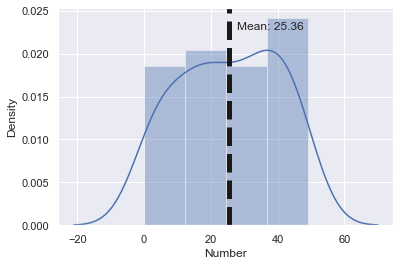

In [118]:
plot_distribution(title['Number'])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

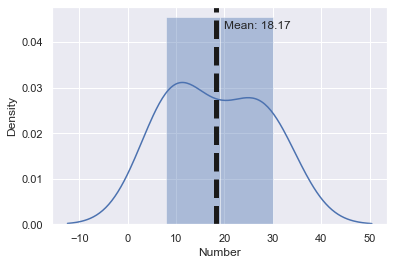

In [119]:
plot_distribution(no_title['Number'])

In [120]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [122]:
sample_size = 6
title_sampled = np.random.choice(title['Number'], sample_size)
no_title_sampled = np.random.choice(no_title['Number'], sample_size)
compare_2_groups(title_sampled, no_title_sampled, 0.05, sample_size)

Statistics=1.201, p=0.257
Same distributions (fail to reject H0)


### Conclusie: Het ontbreken van een META titel lijkt niet significant te zijn

### Hypothese: websites met META beschrijving hebben gemiddeld een hogere rank dan websites zonder META beschrijving

In [114]:
no_description = df[df['META-Description'].isnull()]
description = df[df['META-Description'].notnull()]

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

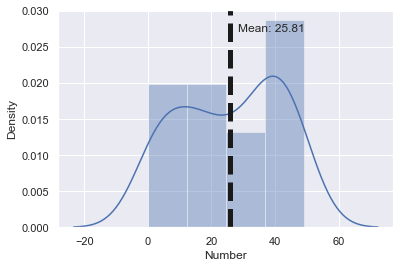

In [115]:
plot_distribution(description['Number'])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

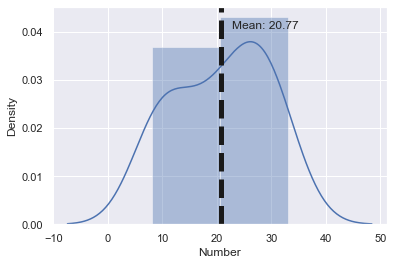

In [116]:
plot_distribution(no_description['Number'])

In [117]:
sample_size = 10
description_sampled = np.random.choice(description['Number'], sample_size)
no_description_sampled = np.random.choice(no_description['Number'], sample_size)
compare_2_groups(description_sampled, no_description_sampled, 0.05, sample_size)

Statistics=1.073, p=0.297
Same distributions (fail to reject H0)


### Conclusie: Het ontbreken van een META beschrijving lijkt niet significant te zijn

### Feature significance

In [56]:
X = cleaned_numeric.iloc[:,1:]  #independent columns
y = cleaned_numeric.iloc[:,0]    #target column i.e price range

In [57]:
X

,1,2,3,4,5,6,7,8,9,10
0,82.48,4.000000,31.00000,1426.00000,10.00000,43.000000,77.000000,6.884000e+03,23.0,753.0
1,82.48,10.000000,17.00000,217.00000,7.00000,42.000000,79.000000,6.330000e+02,21.0,367.0
2,82.48,2.000000,7.00000,2595.00000,14.00000,128.000000,19.000000,1.200000e+01,57.0,252.0
3,82.48,3.000000,31.00000,138.00000,10.00000,2.000000,2.000000,3.600000e+01,52.0,1782.0
4,82.48,3.000000,12.00000,563.00000,5.00000,150.000000,178.000000,1.200000e+01,46.0,175.0
5,82.48,7.000000,7.00000,1029.00000,3.00000,42.000000,79.000000,7.000000e+00,37.0,1651.0
6,82.48,8.000000,3.00000,138.00000,9.00000,32.000000,294.000000,1.300000e+02,58.0,445.0
7,82.48,4.000000,1.00000,613.00000,5.00000,53.000000,23.000000,3.000000e+01,28.0,430.0
8,82.48,1.000000,7.00000,440.00000,5.00000,0.000000,0.000000,6.000000e+00,7.0,150.0
9,82.48,0.000000,0.00000,0.00000,0.00000,13.000000,117.000000,2.715000e+04,0.0,1832.0


In [58]:
y

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
24    24.0
25    25.0
26    26.0
27    27.0
28    28.0
29    29.0
30    30.0
31    31.0
32    32.0
33    33.0
34    34.0
35    35.0
36    36.0
37    37.0
38    38.0
39    39.0
40    40.0
41    41.0
42    42.0
43    43.0
44    44.0
45    45.0
46    46.0
47    47.0
48    48.0
49    49.0
Name: 0, dtype: float64

Feature: 0, Score: -0.38932
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.10952


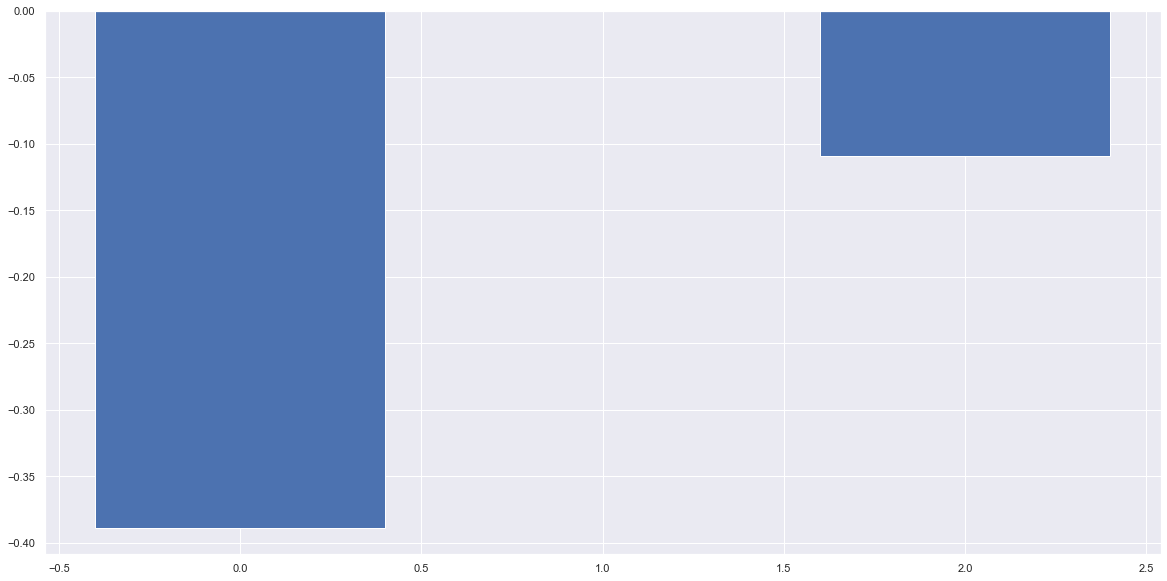

In [74]:
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
# 
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [72]:
pvalue = model.pvalue

AttributeError: 'LogisticRegression' object has no attribute 'pvalue'

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.05789
Feature: 2, Score: 0.08103
Feature: 3, Score: 0.20774
Feature: 4, Score: 0.07410
Feature: 5, Score: 0.07546
Feature: 6, Score: 0.00014
Feature: 7, Score: 0.05289
Feature: 8, Score: 0.30079
Feature: 9, Score: 0.14995


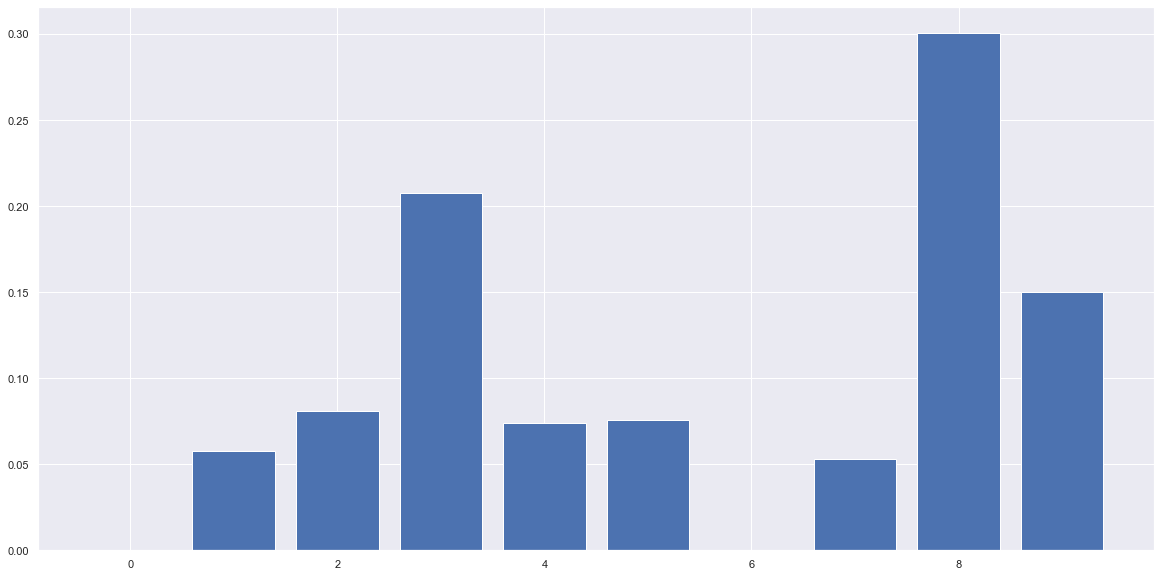

In [60]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()